In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import matplotlib as mplib
import matplotlib.pyplot as plt
import seaborn as sns
import PandaSurvey
import weightedcalcs as wc

/Users/Ariel/Desktop/NYU/Summer 2021/Policy and Data Studio/Repos/Ariel_Medex/env/lib/python3.9/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('Data/usa_00003.csv')

In [3]:
df.columns

Index(['YEAR', 'SAMPLE', 'SERIAL', 'CBSERIAL', 'HHWT', 'CLUSTER', 'STATEICP',
       'COUNTYICP', 'PUMA', 'STRATA', 'GQ', 'PERNUM', 'PERWT', 'SEX', 'AGE',
       'RACE', 'RACED', 'HISPAN', 'HISPAND', 'CITIZEN', 'YRSUSA2', 'HINSEMP',
       'HINSPUR', 'HINSCAID', 'EMPSTAT', 'EMPSTATD', 'INCTOT', 'POVERTY'],
      dtype='object')

In [4]:
df.describe

<bound method NDFrame.describe of         YEAR  SAMPLE  SERIAL       CBSERIAL   HHWT        CLUSTER  STATEICP  \
0       2009  200901  816419             89  150.0  2009008164191        13   
1       2009  200901  816422            147  213.0  2009008164221        13   
2       2009  200901  816422            147  213.0  2009008164221        13   
3       2009  200901  816422            147  213.0  2009008164221        13   
4       2009  200901  816422            147  213.0  2009008164221        13   
...      ...     ...     ...            ...    ...            ...       ...   
237142  2019  201901  923328  2019001412405   72.0  2019009233281        13   
237143  2019  201901  923328  2019001412405   72.0  2019009233281        13   
237144  2019  201901  923328  2019001412405   72.0  2019009233281        13   
237145  2019  201901  923328  2019001412405   72.0  2019009233281        13   
237146  2019  201901  923331  2019001412438   94.0  2019009233311        13   

        COUNTYICP

In [5]:
df["INCTOT"].replace({9999999: np.nan}, inplace=True) #removing coded variable for no income information
df

,YEAR,SAMPLE,SERIAL,CBSERIAL,HHWT,CLUSTER,STATEICP,COUNTYICP,PUMA,STRATA,...,HISPAND,CITIZEN,YRSUSA2,HINSEMP,HINSPUR,HINSCAID,EMPSTAT,EMPSTATD,INCTOT,POVERTY
0,2009,200901,816419,89,150.0,2009008164191,13,810,4101,410136,...,0,2,5,2,1,2,1,10,3800.0,33
1,2009,200901,816422,147,213.0,2009008164221,13,470,4015,401536,...,0,3,2,1,1,2,1,10,15000.0,93
2,2009,200901,816422,147,213.0,2009008164221,13,470,4015,401536,...,0,3,2,1,1,2,3,30,0.0,93
3,2009,200901,816422,147,213.0,2009008164221,13,470,4015,401536,...,0,3,2,1,1,2,0,0,0.0,93
4,2009,200901,816422,147,213.0,2009008164221,13,470,4015,401536,...,0,3,2,1,1,2,0,0,NaN,93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237142,2019,201901,923328,2019001412405,72.0,2019009233281,13,470,4003,400336,...,0,0,0,1,1,2,3,30,0.0,53
237143,2019,201901,923328,2019001412405,72.0,2019009233281,13,470,4003,400336,...,0,0,0,1,1,2,0,0,NaN,53
237144,2019,201901,923328,2019001412405,72.0,2019009233281,13,470,4003,400336,...,0,0,0,1,1,2,0,0,NaN,53
237145,2019,201901,923328,2019001412405,72.0,2019009233281,13,470,4003,400336,...,0,0,0,1,1,2,0,0,NaN,53


In [6]:
df1 = df[df['INCTOT'].notna()]
df1

,YEAR,SAMPLE,SERIAL,CBSERIAL,HHWT,CLUSTER,STATEICP,COUNTYICP,PUMA,STRATA,...,HISPAND,CITIZEN,YRSUSA2,HINSEMP,HINSPUR,HINSCAID,EMPSTAT,EMPSTATD,INCTOT,POVERTY
0,2009,200901,816419,89,150.0,2009008164191,13,810,4101,410136,...,0,2,5,2,1,2,1,10,3800.0,33
1,2009,200901,816422,147,213.0,2009008164221,13,470,4015,401536,...,0,3,2,1,1,2,1,10,15000.0,93
2,2009,200901,816422,147,213.0,2009008164221,13,470,4015,401536,...,0,3,2,1,1,2,3,30,0.0,93
3,2009,200901,816422,147,213.0,2009008164221,13,470,4015,401536,...,0,3,2,1,1,2,0,0,0.0,93
5,2009,200901,816465,717,85.0,2009008164651,13,810,4103,410336,...,0,3,3,1,1,2,3,30,0.0,114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237138,2019,201901,923317,2019001412249,56.0,2019009233171,13,610,3803,380336,...,200,0,5,1,1,2,3,30,13300.0,101
237140,2019,201901,923323,2019001412338,161.0,2019009233231,13,470,4010,401036,...,0,2,5,1,1,2,3,30,8800.0,72
237141,2019,201901,923328,2019001412405,72.0,2019009233281,13,470,4003,400336,...,0,0,0,1,1,2,3,30,16200.0,53
237142,2019,201901,923328,2019001412405,72.0,2019009233281,13,470,4003,400336,...,0,0,0,1,1,2,3,30,0.0,53


Note: You might have to restart the kernel in order for this code to work

# Weighting Survey Variables/Data Cleaning

In [7]:
calc = wc.Calculator("PERWT") # code to help create the weighted variables

Creating a weight for Average Income using the person weight from the survey

In [8]:
avg_inc = calc.mean(df1, 'INCTOT') #calculation for the average income of the entire dataset
avg_inc

13067.003986521218

Tabulating Average Income by Year and Borough (County)

In [9]:
year_borough = df1.groupby(['YEAR', 'COUNTYICP'], as_index=False)


In [10]:
yr_br = calc.mean(year_borough, 'INCTOT').reset_index()
yr_br.head()

,index,YEAR,COUNTYICP,NaN
0,0,2009,50,8843.186400
1,1,2009,470,10712.272412
2,2,2009,610,12775.997252
3,3,2009,810,11662.357063
4,4,2009,850,12808.379452


In [11]:
yr_br.columns

Index(['index', 'YEAR', 'COUNTYICP', None], dtype='object')

In [12]:
yr_br1 = yr_br.rename(columns={None: 'AVGINC'})
yr_br1

,index,YEAR,COUNTYICP,AVGINC
0,0,2009,50,8843.186400
1,1,2009,470,10712.272412
2,2,2009,610,12775.997252
3,3,2009,810,11662.357063
4,4,2009,850,12808.379452
5,5,2010,50,9719.796844
6,6,2010,470,10949.801437
7,7,2010,610,11934.504739
8,8,2010,810,12832.498127
9,9,2010,850,12033.415861


Tabulating Average Income by Year and Borough (County) and PUMA (Public Use MicroData Areas)

In [33]:
puma = df1.groupby(['YEAR', 'COUNTYICP', 'PUMA'], as_index=False)

In [34]:
PUMA = calc.mean(puma, 'INCTOT').reset_index()
neighborhood = PUMA.rename(columns={None: 'AVGINC'})
neighborhood

,index,YEAR,COUNTYICP,PUMA,AVGINC
0,0,2009,50,3701,8366.656996
1,1,2009,50,3702,9328.643894
2,2,2009,50,3703,9649.703559
3,3,2009,50,3704,11809.218087
4,4,2009,50,3705,8204.926644
...,...,...,...,...,...
600,600,2019,810,4113,19133.717842
601,601,2019,810,4114,14192.810042
602,602,2019,850,3901,19495.843237
603,603,2019,850,3902,18042.498568


## Weighting the Medicaid Total Survey Population 

In [13]:
df.groupby('YEAR').sum('PERWT')

,SAMPLE,SERIAL,CBSERIAL,HHWT,CLUSTER,STATEICP,COUNTYICP,PUMA,STRATA,GQ,...,HISPAND,CITIZEN,YRSUSA2,HINSEMP,HINSPUR,HINSCAID,EMPSTAT,EMPSTATD,INCTOT,POVERTY
YEAR,,,,,,,,,,,,,,,,,,,,,
2009,3522196332,15072907490,12279265000,2158924.0,35221938729092492,227916,8508960,68955111,6896142252,20131,...,2090135,14969,24739,18726,18634,35064,28102,281360,133667776.0,2569428
2010,3954493674,17076426239,13920895834,2390044.0,39544910764282288,255762,9618460,77431456,7743853864,22086,...,2339034,17382,27451,21033,20803,39348,31084,311238,157909436.0,2937302
2011,4400290981,18525286702,16479909261,2401464.0,44002876252888840,284453,10689890,86232184,8624006116,27219,...,2385456,18972,30523,23170,23005,43762,35130,351654,170194055.0,3125840
2012,4375316946,18329168493,16238949246,2415467.0,43753135291706960,282698,10651600,85765151,8577297956,26897,...,2511087,19177,31695,23067,23018,43492,35301,353325,170314136.0,3091570
2013,4238593856,17729246848,15682877463,2461305.0,42385905292489600,273728,10361100,83056165,8306374516,25878,...,2364551,18388,30339,22342,22130,42112,34193,342270,182459176.0,3138021
2014,4434447218,18570139105,16406474292,2551652.0,44344437701413512,286234,10734580,86827502,8683542848,26587,...,2380356,20570,33145,23364,23328,44036,35926,359688,192502188.0,3323508
2015,4691950785,19800744614,17587920849,2677598.0,46919473007469632,302705,11522550,91876852,9188523460,28168,...,2659222,21633,35537,24678,24677,46570,37672,377219,223774884.0,3678706
2016,4644887040,19665790570,17672320809,2724178.0,46448836657928880,299520,11542280,90990382,9099867640,27913,...,2510301,21973,35898,24515,24415,46080,37673,377276,242801658.0,3848161
2017,4607254242,19620389097,46072331207835680,2735891.0,46072510203913776,296946,11380140,90107946,9011616912,27886,...,2555933,22117,35769,24311,24466,45684,37396,374556,257127964.0,3899667


In [14]:
df_weighted = df.groupby(['YEAR', 'COUNTYICP'], as_index=False).sum('PERWT')

In [15]:
df_weighted

,YEAR,COUNTYICP,SAMPLE,SERIAL,CBSERIAL,HHWT,CLUSTER,STATEICP,PUMA,STRATA,...,HISPAND,CITIZEN,YRSUSA2,HINSEMP,HINSPUR,HINSCAID,EMPSTAT,EMPSTATD,INCTOT,POVERTY
0,2009,50,805613010,3446107288,2785106034,520870.0,8056124461076890,52130,14862963,1486440660,...,768973,2655,5096,4220,4224,8020,6112,61212,23894224.0,466542
1,2009,470,1318714164,5641464027,4567508128,774537.0,13187132414646788,85332,26318975,2632133804,...,424998,5587,8852,7037,7027,13128,10265,102784,48521686.0,942328
2,2009,610,441781299,1889913574,1529582282,259874.0,4417809899137939,28587,8365942,836673364,...,387974,1822,3575,2361,2351,4398,4199,42018,21651904.0,292355
3,2009,810,819475179,3508695670,2886624209,508597.0,8194746086960779,53027,16753675,1675514344,...,467266,4558,6623,4338,4318,8158,6398,64058,33779108.0,750665
4,2009,850,136612680,586726931,510444347,95046.0,1366125867269990,8840,2653556,265380080,...,40924,347,593,770,714,1360,1128,11288,5820854.0,117538
5,2010,50,898876472,3882718547,3183119694,577706.0,8988758827189942,58136,16574938,1657654792,...,875818,3106,5558,4733,4751,8944,6693,67016,29191283.0,540301
6,2010,470,1451227220,6261246035,5019869525,843034.0,14512262612467572,93860,28950432,2895303120,...,476500,6345,9843,7620,7564,14440,11227,112408,54499360.0,1052039
7,2010,610,493055453,2131032089,1766339712,307481.0,4930551310323343,31889,9332164,933304708,...,416164,1984,3664,2683,2636,4906,4591,45962,25567164.0,348101
8,2010,810,977467863,4224053609,3491501274,582341.0,9774672240540964,63219,19975026,1997677668,...,526410,5552,7672,5242,5160,9726,7422,74338,42574509.0,874924
9,2010,850,133866666,577375959,460065629,79482.0,1338665773760256,8658,2598896,259913576,...,44142,395,714,755,692,1332,1151,11514,6077120.0,121937


# Plotting Average Income across NYC

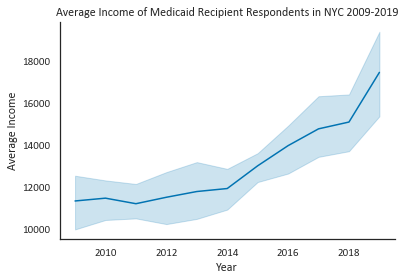

In [22]:
i = sns.lineplot(x='YEAR', y='AVGINC', data=yr_br1)
i.ticklabel_format(style='plain', axis='both')
sns.despine()
plt.ylabel('Average Income')
plt.xlabel('Year')
plt.title('Average Income of Medicaid Recipient Respondents in NYC 2009-2019')
plt.savefig('NYC Medicaid Population Average Income 2009-2019.png')

Medicaid recipient count across NYC

# Data Visualizations by County/Borough

In [106]:
brooklyn = df[df['COUNTYICP'] == 470]
brooklyn.head()

,YEAR,SAMPLE,SERIAL,CBSERIAL,HHWT,CLUSTER,STATEICP,COUNTYICP,PUMA,STRATA,...,HISPAND,CITIZEN,YRSUSA2,HINSEMP,HINSPUR,HINSCAID,EMPSTAT,EMPSTATD,INCTOT,POVERTY
1,2009,200901,816422,147,213.0,2009008164221,13,470,4015,401536,...,0,3,2,1,1,2,1,10,15000,93
2,2009,200901,816422,147,213.0,2009008164221,13,470,4015,401536,...,0,3,2,1,1,2,3,30,0,93
3,2009,200901,816422,147,213.0,2009008164221,13,470,4015,401536,...,0,3,2,1,1,2,0,0,0,93
4,2009,200901,816422,147,213.0,2009008164221,13,470,4015,401536,...,0,3,2,1,1,2,0,0,9999999,93
9,2009,200901,816473,862,119.0,2009008164731,13,470,4003,400336,...,0,0,0,1,1,2,0,0,9999999,501


In [108]:
brooklyn_weighted = brooklyn.groupby('YEAR', as_index=False).sum('PERWT')

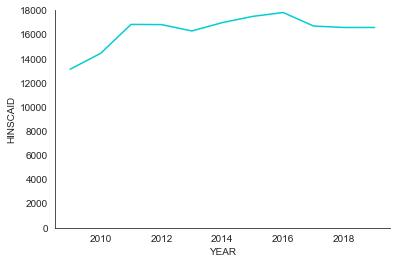

In [179]:
g = sns.lineplot(x="YEAR", y="HINSCAID",
                     data=brooklyn_weighted, color="#00CED1")
g.set(ylim=(0, 18000))
sns.despine()

In [112]:
bronx = df[df['COUNTYICP'] == 50]

In [113]:
bronx_weighted = bronx.groupby('YEAR', as_index=False).sum('PERWT')

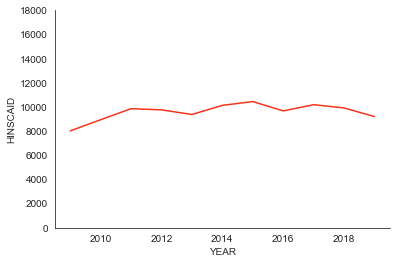

In [180]:
b = sns.lineplot(x="YEAR", y="HINSCAID",
                     data=bronx_weighted, color="#F5331C")
b.set(ylim=(0, 18000))
sns.despine()

In [115]:
manhattan = df[df['COUNTYICP'] == 610]

In [118]:
manhattan_weighted = manhattan.groupby('YEAR', as_index=False).sum('PERWT')

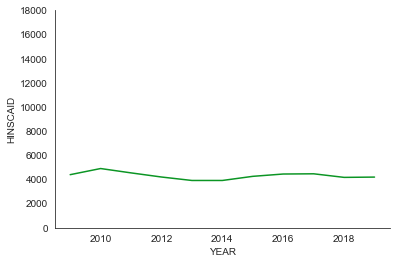

In [181]:
m = sns.lineplot(x="YEAR", y="HINSCAID",
                     data=manhattan_weighted, color="#0B9524")
m.set(ylim=(0, 18000))
sns.despine()

In [126]:
staten_island = df[df['COUNTYICP'] == 850]

In [127]:
statenisland_weighted = staten_island.groupby('YEAR', as_index=False).sum('PERWT')

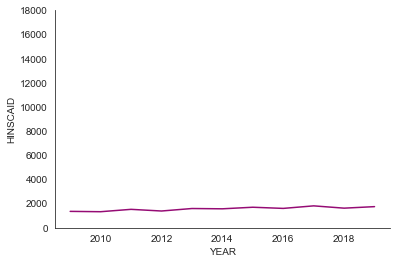

In [182]:
s = sns.lineplot(x="YEAR", y="HINSCAID",
                     data=statenisland_weighted, color="#950B74")
s.set(ylim=(0,18000))
sns.despine()

In [11]:
queens = df[df['COUNTYICP'] == 810]

In [12]:
queens_weighted = queens.groupby('YEAR', as_index=False).sum('PERWT')

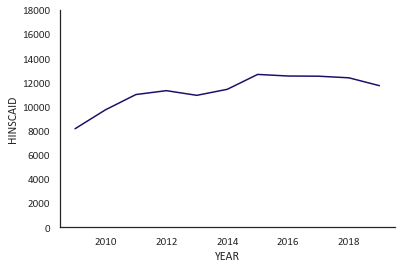

In [13]:
q = sns.lineplot(x="YEAR", y="HINSCAID",
                     data=queens_weighted, color="#1F0D68")
q.set(ylim=(0,18000))
sns.despine()

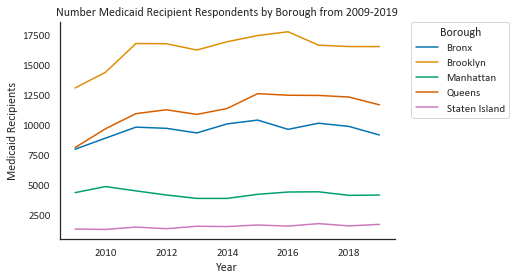

In [153]:
# this line below only needs to be run once to set the style for all plots
sns.set_theme(style='white', palette=sns.color_palette("colorblind", n_colors=5), font_scale=1, font='calibri')
df_weighted = df_weighted.replace([50, 470, 610, 810, 850], ['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'])
sns.lineplot(x='YEAR', y='HINSCAID', hue='COUNTYICP', 
             data=df_weighted,  palette=sns.color_palette("colorblind", n_colors=5))
#ny.set(ylim=(0, 20000))
sns.despine()
plt.ylabel('Medicaid Recipients')
plt.xlabel('Year')
plt.title('Number Medicaid Recipient Respondents by Borough from 2009-2019')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="Borough")
plt.savefig('Medicaid Population 2009-2019 by Borough Weighted.png', bbox_inches='tight')

# Data Visualization by PUMA

[Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Average Income'),
 Text(0.5, 1.0, 'Average Income of West Village Medicaid Recipients by Year')]

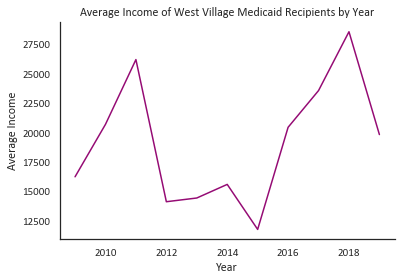

In [39]:
west_village = neighborhood[neighborhood['PUMA'] == 3807] #West Village is one of the richest areas of Manhattan/NYC

w = sns.lineplot(x="YEAR", y="AVGINC",
                     data=west_village, color="#950B74")
sns.despine()
w.set(xlabel='Year', ylabel='Average Income', title='Average Income of West Village Medicaid Recipients by Year')

[Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Average Income'),
 Text(0.5, 1.0, 'Average Income of Longwood Medicaid Recipients by Year'),
 (0.0, 27500.0)]

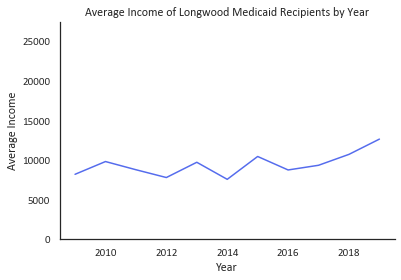

In [41]:
longwood = neighborhood[neighborhood['PUMA'] == 3710] #Longwood is one of the poorest areas of the Bronx and NYC

l = sns.lineplot(x="YEAR", y="AVGINC",
                     data=longwood, color="#556CED")
sns.despine()
l.set(xlabel='Year', ylabel='Average Income', title='Average Income of Longwood Medicaid Recipients by Year', ylim=(0,27500))

# Data Visualization by Attributes

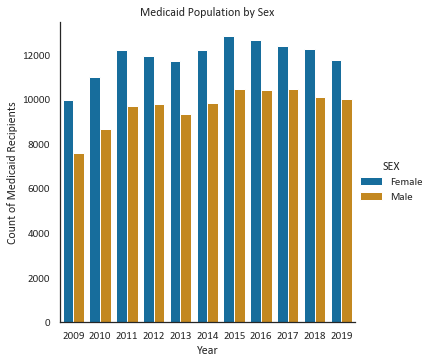

In [31]:
df["SEX"].replace({1: "Male", 2: "Female"}, inplace=True) #recoding the Sex variable from numbers to description
j = sns.catplot(x="YEAR", col="HINSCAID", hue='SEX',
                     data=df, kind='count', palette=sns.color_palette("colorblind"))
j.set(xlabel='Year', ylabel='Count of Medicaid Recipients', title='Medicaid Population by Sex')

This plot is unweighted. I am having difficulty plotting with the weighted dataset using variables besides Medicaid status

# Unweighted Data Visualizations

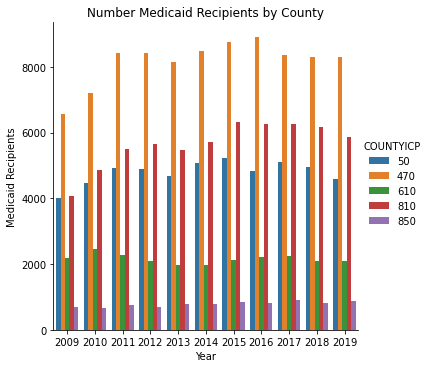

In [79]:
h = sns.catplot(x="YEAR", hue="COUNTYICP", col="HINSCAID",
                     data=df, kind="count")
plt.ylabel('Medicaid Recipients')
plt.xlabel('Year')
plt.title('Number Medicaid Recipients by County')
plt.savefig('Medicaid Population 2009-2019 by NYC County.png', bbox_inches='tight')

Text(0.5, 6.79999999999999, 'Year')

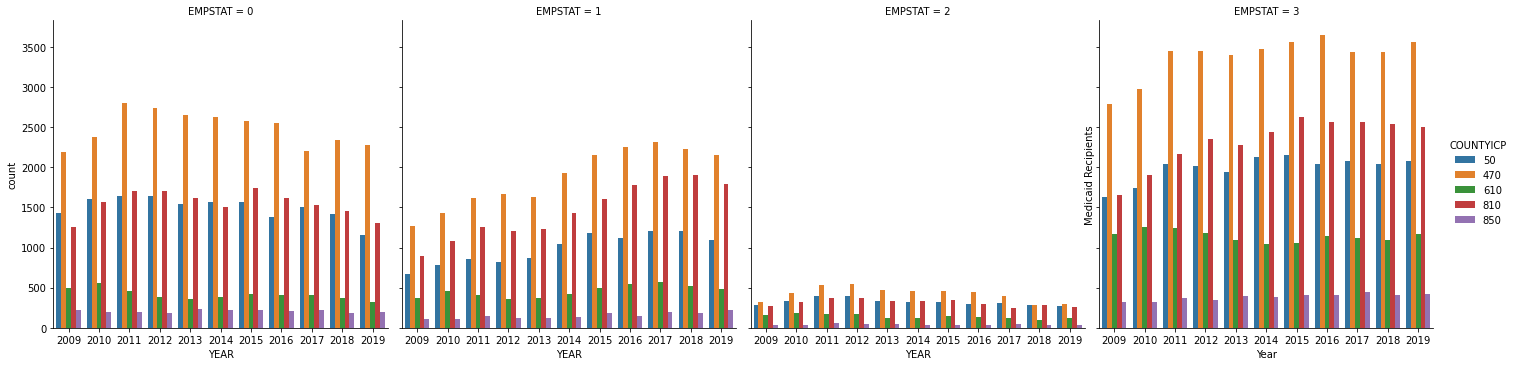

In [6]:
i = sns.catplot(x="YEAR", hue="COUNTYICP", col="EMPSTAT",
                     data=df, kind="count")
plt.ylabel('Medicaid Recipients')
plt.xlabel('Year')

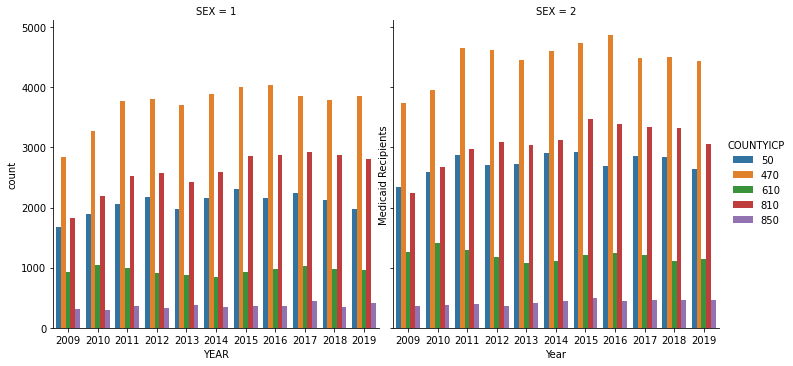

In [7]:
j = sns.catplot(x="YEAR", hue="COUNTYICP", col="SEX",
                     data=df, kind="count")
plt.ylabel('Medicaid Recipients')
plt.xlabel('Year')
plt.savefig('Medicaid Population 2009-2019 by NYC County and Sex.png', bbox_inches='tight')

Text(0.5, 6.79999999999999, 'Year')

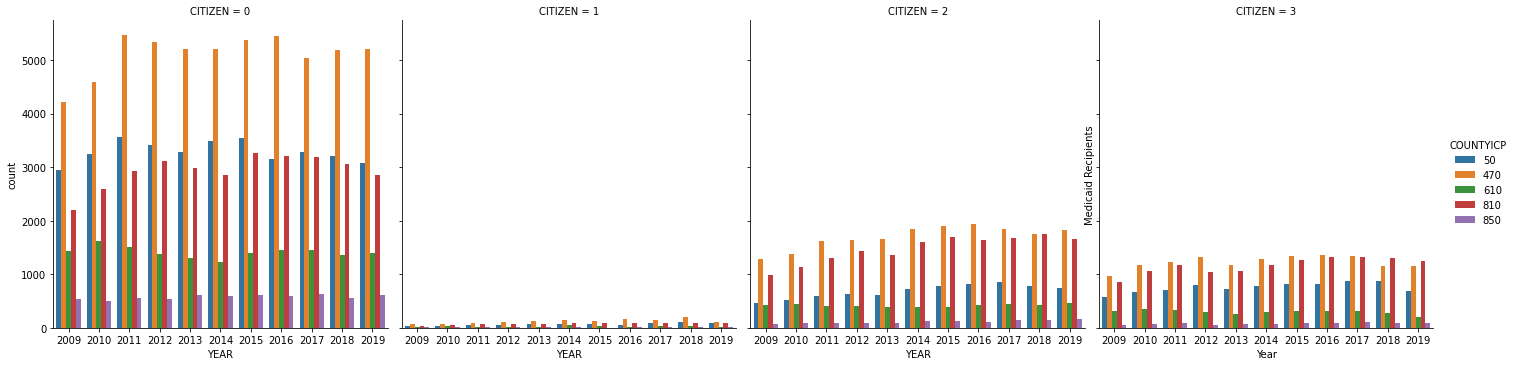

In [8]:
k = sns.catplot(x="YEAR", hue="COUNTYICP", col="CITIZEN",
                     data=df, kind="count")
plt.ylabel('Medicaid Recipients')
plt.xlabel('Year')

Text(0.5, 6.79999999999999, 'Year')

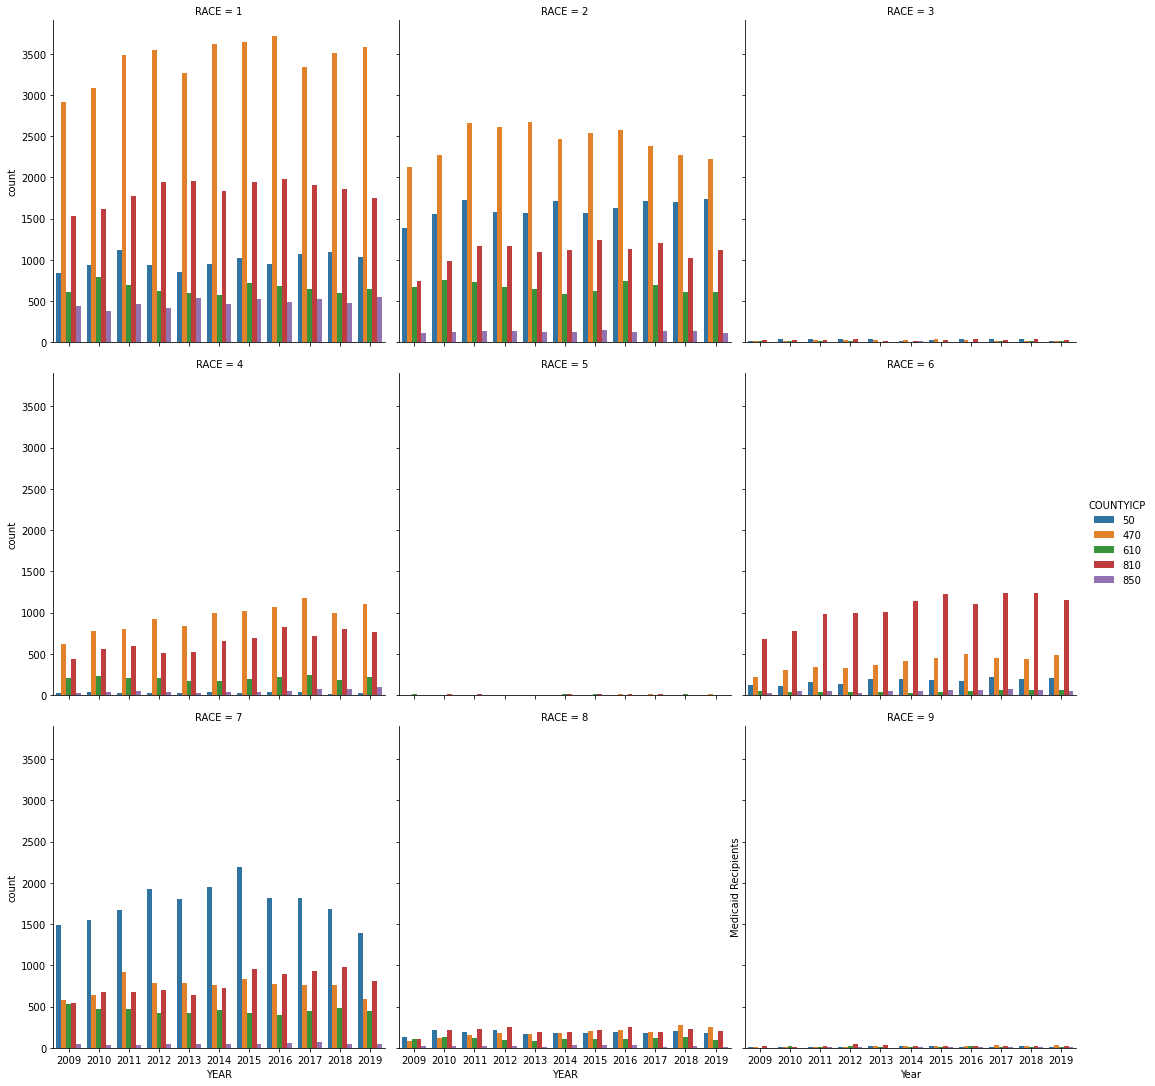

In [10]:
l = sns.catplot(x="YEAR", hue="COUNTYICP", col="RACE",
                     data=df, kind="count", col_wrap= 3)
plt.ylabel('Medicaid Recipients')
plt.xlabel('Year')